In [ ]:
# Question 01

In [31]:
import pandas as pd
data = pd.read_csv(r"Mobile_Dataset.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [32]:
# count of values=0 in mentioned columns
print((data[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]==0).sum())

battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
dtype: int64


In [33]:
# replace 0 with NaN
import numpy as np
data[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]=data[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].replace(0,np.NAN)
print(data)

      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0               842     0          2.2         0   1.0       0           7   
1              1021     1          0.5         1   NaN       1          53   
2               563     1          0.5         1   2.0       1          41   
3               615     1          2.5         0   NaN       0          10   
4              1821     1          1.2         0  13.0       1          44   
...             ...   ...          ...       ...   ...     ...         ...   
1995            794     1          0.5         1   NaN       1           2   
1996           1965     1          2.6         1   NaN       0          39   
1997           1911     0          0.9         1   1.0       1          36   
1998           1512     0          0.9         0   4.0       1          46   
1999            510     1          2.0         1   5.0       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram

In [34]:
# replace NaN with mean
data=data.fillna(data.mean())
print(data)

      battery_power  blue  clock_speed  dual_sim       fc  four_g  int_memory  \
0               842     0          2.2         0   1.0000       0           7   
1              1021     1          0.5         1   5.6481       1          53   
2               563     1          0.5         1   2.0000       1          41   
3               615     1          2.5         0   5.6481       0          10   
4              1821     1          1.2         0  13.0000       1          44   
...             ...   ...          ...       ...      ...     ...         ...   
1995            794     1          0.5         1   5.6481       1           2   
1996           1965     1          2.6         1   5.6481       0          39   
1997           1911     0          0.9         1   1.0000       1          36   
1998           1512     0          0.9         0   4.0000       1          46   
1999            510     1          2.0         1   5.0000       1          45   

      m_dep  mobile_wt  n_c

In [35]:
# data transform
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataTransform = data.copy()
for d in data.columns:
    dataTransform[d] = labelencoder.fit_transform(data[d])

In [36]:
print(dataTransform)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               255     0           17         0   0       0           5   
1               382     1            0         1   5       1          51   
2                48     1            0         1   1       1          39   
3                88     1           20         0   5       0           8   
4               954     1            7         0  13       1          42   
...             ...   ...          ...       ...  ..     ...         ...   
1995            216     1            0         1   5       1           0   
1996           1064     1           21         1   5       0          37   
1997           1027     0            4         1   0       1          34   
1998            732     0            4         0   3       1          44   
1999              8     1           15         1   4       1          43   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [37]:
X = dataTransform.drop(['price_range'],axis=1)
print(X)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               255     0           17         0   0       0           5   
1               382     1            0         1   5       1          51   
2                48     1            0         1   1       1          39   
3                88     1           20         0   5       0           8   
4               954     1            7         0  13       1          42   
...             ...   ...          ...       ...  ..     ...         ...   
1995            216     1            0         1   5       1           0   
1996           1064     1           21         1   5       0          37   
1997           1027     0            4         1   0       1          34   
1998            732     0            4         0   3       1          44   
1999              8     1           15         1   4       1          43   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0        

In [38]:
Y = dataTransform['price_range']
print(Y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [39]:
data_feature_list = list(X.columns)
print(data_feature_list)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [40]:
# data split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1239            545     0           11         0   5       0          37   
426             508     1           17         1   9       0          45   
1249              3     1           23         1   1       0          52   
727             791     0            1         1   5       0           5   
800             682     0            4         0  12       1          18   
...             ...   ...          ...       ...  ..     ...         ...   
1016             39     1           23         0   5       1          52   
165              14     0            9         1   2       1          31   
7              1056     0            0         1   5       0          22   
219             761     0            6         0   3       0          49   
1350            653     0           11         1   8       1          24   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1239     

In [41]:
print(X_test)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
423             858     1           20         0   1       0           9   
1495            704     0           25         0   3       1          18   
1618              1     0            3         0   7       0          50   
1099            867     0            0         0   5       1          58   
1307            245     0           12         1   7       1          24   
...             ...   ...          ...       ...  ..     ...         ...   
739             585     0            5         1   5       1          13   
1379            203     0           24         0   1       0          60   
837             212     1            0         0  15       0           9   
877             685     0            1         0   1       0          46   
828            1064     0            0         0   6       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
423      

In [42]:
print(Y_train)

1239    3
426     0
1249    2
727     1
800     1
       ..
1016    0
165     3
7       0
219     3
1350    3
Name: price_range, Length: 1600, dtype: int64


In [43]:
print(Y_test)

423     0
1495    0
1618    2
1099    0
1307    0
       ..
739     2
1379    1
837     2
877     3
828     3
Name: price_range, Length: 400, dtype: int64


In [44]:
print(X_train.shape,Y_train.shape)

(1600, 20) (1600,)


In [45]:
print(X_test.shape,Y_test.shape)

(400, 20) (400,)


In [46]:
# apply KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1 0 1 0 0 3 0 3 1 1 2 3 0 3 1 0 1 1 0 2 2 1 1 0 1 2 1 0 0 2 0 1 1 2 1 1 0
 3 3 3 1 0 1 3 1 1 0 3 0 3 1 1 0 3 0 0 2 2 3 0 0 1 3 1 0 2 1 3 3 2 2 2 0 2
 3 1 0 1 1 1 3 0 1 0 2 3 2 3 1 1 1 3 1 3 0 1 3 2 1 0 0 3 3 0 3 3 3 1 3 1 0
 0 2 1 0 1 2 1 2 2 0 2 1 2 2 0 1 3 1 1 0 1 1 0 1 2 1 2 1 3 0 1 2 3 0 0 0 3
 2 3 3 2 2 1 3 2 2 2 3 1 1 3 1 1 3 3 3 0 2 2 1 2 0 3 0 3 1 3 3 2 2 1 0 2 3
 3 3 0 1 0 3 3 1 3 0 3 3 1 3 1 1 0 3 1 0 3 3 0 0 1 0 3 1 2 2 2 0 1 1 0 0 2
 3 3 2 3 3 3 3 0 2 0 0 3 1 1 3 3 3 0 1 2 2 1 0 1 0 3 2 2 1 1 2 0 2 0 2 0 2
 2 2 2 3 3 2 1 0 0 2 1 2 2 1 3 0 0 0 0 2 2 1 2 3 0 1 3 2 0 2 2 3 0 0 3 2 0
 3 0 0 1 0 1 2 2 0 2 1 1 0 1 3 1 1 1 1 3 0 1 0 3 3 1 3 2 2 0 0 0 1 2 2 0 0
 3 2 3 0 0 0 3 3 1 1 0 3 3 0 0 0 2 0 2 2 0 2 3 3 1 0 2 1 2 2 3 0 3 3 1 0 3
 3 0 1 2 2 2 0 3 1 1 0 3 0 2 2 1 1 1 1 0 3 3 0 2 0 2 1 2 2 3]


In [47]:
mae = mean_absolute_error(Y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.085


In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  91.5


In [49]:
from sklearn import metrics
print("Classification Report : ",metrics.classification_report(y_pred,Y_test,target_names=["0","1","2","3"]))

Classification Report :                precision    recall  f1-score   support

           0       0.94      0.95      0.94       106
           1       0.93      0.87      0.90       105
           2       0.86      0.90      0.88        90
           3       0.93      0.94      0.93        99

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.91       400



In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred,labels=[0,1,2,3])
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[101   7   0   0]
 [  5  91   2   0]
 [  0   7  81   6]
 [  0   0   7  93]]


In [51]:
print("Normalized Confusion MAtrix : ")
print(np.round(cm/np.sum(cm,axis=1).reshape(-1,1),4))

Normalized Confusion MAtrix : 
[[0.9352 0.0648 0.     0.    ]
 [0.051  0.9286 0.0204 0.    ]
 [0.     0.0745 0.8617 0.0638]
 [0.     0.     0.07   0.93  ]]


In [ ]:
# Question_02

In [52]:
df = pd.read_csv(r"Mobile_Dataset.csv")
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [53]:
print((df[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]==0).sum())

battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
dtype: int64


In [54]:
df[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]=df[["battery_power",'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']].replace(0,np.NAN)
print(df)

      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0               842     0          2.2         0   1.0       0           7   
1              1021     1          0.5         1   NaN       1          53   
2               563     1          0.5         1   2.0       1          41   
3               615     1          2.5         0   NaN       0          10   
4              1821     1          1.2         0  13.0       1          44   
...             ...   ...          ...       ...   ...     ...         ...   
1995            794     1          0.5         1   NaN       1           2   
1996           1965     1          2.6         1   NaN       0          39   
1997           1911     0          0.9         1   1.0       1          36   
1998           1512     0          0.9         0   4.0       1          46   
1999            510     1          2.0         1   5.0       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram

In [55]:
df=data.fillna(df.mean())
print(df)

      battery_power  blue  clock_speed  dual_sim       fc  four_g  int_memory  \
0               842     0          2.2         0   1.0000       0           7   
1              1021     1          0.5         1   5.6481       1          53   
2               563     1          0.5         1   2.0000       1          41   
3               615     1          2.5         0   5.6481       0          10   
4              1821     1          1.2         0  13.0000       1          44   
...             ...   ...          ...       ...      ...     ...         ...   
1995            794     1          0.5         1   5.6481       1           2   
1996           1965     1          2.6         1   5.6481       0          39   
1997           1911     0          0.9         1   1.0000       1          36   
1998           1512     0          0.9         0   4.0000       1          46   
1999            510     1          2.0         1   5.0000       1          45   

      m_dep  mobile_wt  n_c

In [56]:
data_set = df.values
print(data_set)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 2.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 3.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 3.000e+00]]


In [57]:
X = data_set[:,0:20]

In [58]:
Y = data_set[:,20]

In [60]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [61]:
# transform and split data train, test and validation
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2, random_state = 43)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [62]:
# apply MLP model with 32 neurons, 20 inputs and 4 outputs
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax'),
])
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
50/50 [==============================] - 1s 9ms/step - loss: 1.3846 - accuracy: 0.2937 - val_loss: 1.3571 - val_accuracy: 0.3400
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 1.3351 - accuracy: 0.3688 - val_loss: 1.3125 - val_accuracy: 0.3900
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 1.2706 - accuracy: 0.4444 - val_loss: 1.2244 - val_accuracy: 0.4900
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 1.1466 - accuracy: 0.5450 - val_loss: 1.0630 - val_accuracy: 0.5850
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 0.9677 - accuracy: 0.6231 - val_loss: 0.8743 - val_accuracy: 0.6650
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.8117 - accuracy: 0.6938 - val_loss: 0.7304 - val_accuracy: 0.7450
Epoch 7/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.7569 - val_loss: 0.6335 - val_accuracy: 0.8100
Epoch 8/20
50/50 [==

In [63]:
# calculate accuracy in MLP model
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8900


[0.296998530626297, 0.8899999856948853]

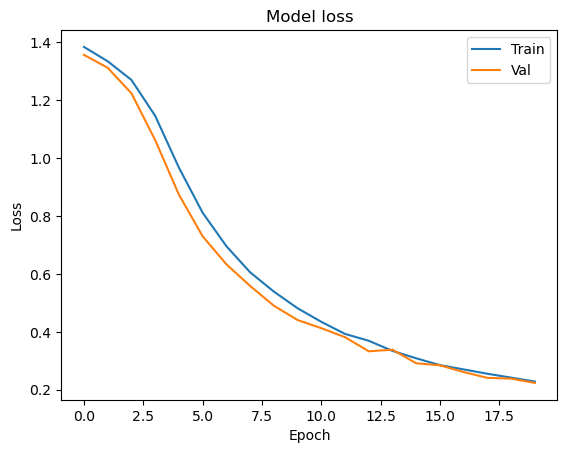

In [64]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

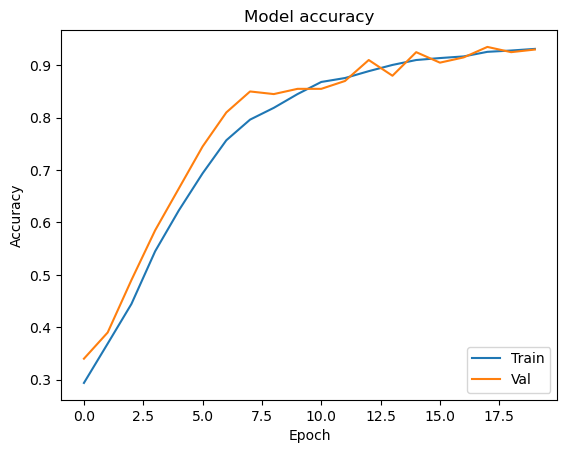

In [65]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [66]:
def predictionrelease(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [67]:
pred_test=model.predict(X_test)
test_preds=predictionrelease(pred_test)

7/7 [==============================] - 0s 2ms/step


In [68]:
print(metrics.classification_report(Y_test,test_preds,target_names=["0","1","2","3"]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.92      0.90      0.91        51
           2       0.88      0.79      0.83        57
           3       0.81      0.91      0.86        43

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [69]:
print(metrics.confusion_matrix(Y_test,test_preds,labels=[0,1,2,3]))

[[48  1  0  0]
 [ 3 46  2  0]
 [ 0  3 45  9]
 [ 0  0  4 39]]


In [ ]:
# Comparison 

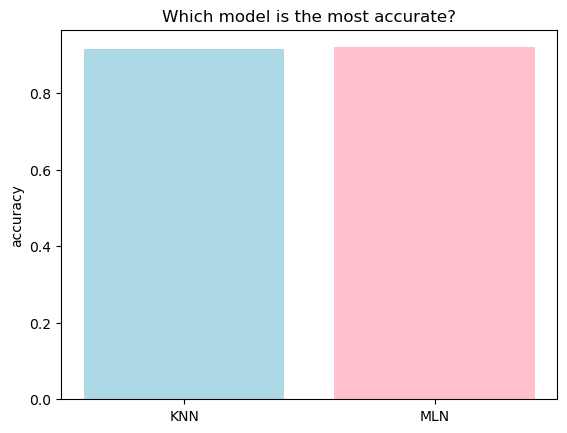

In [70]:
models = ['KNN','MLN']
acc_scores = [0.91500, 0.9200]

plt.bar(models, acc_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy")
plt.title("Which model is the most accurate?")
plt.show()